In [2]:
pip install opencv-python


   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/39.0 MB ? eta -:--:--
   - -------------------------------------- 1.0/39.0 MB 4.0 MB/s eta 0:00:10
   ---- ----------------------------------- 4.2/39.0 MB 9.6 MB/s eta 0:00:04
   ------------ --------------------------- 11.8/39.0 MB 19.0 MB/s eta 0:00:02
   ---------------- ----------------------- 16.3/39.0 MB 23.4 MB/s eta 0:00:01
   ------------------- -------------------- 19.4/39.0 MB 19.2 MB/s eta 0:00:02
   ---------------------- ----------------- 21.5/39.0 MB 17.2 MB/s eta 0:00:02
   ------------------------ --------------- 23.6/39.0 MB 16.1 MB/s eta 0:00:01
   --------------------------- ------------ 26.5/39.0 MB 15.7 MB/s eta 0:00:01
   -------------------------------- ------- 32.0/39.0 MB 16.9 MB/s eta 0:00:01
   ---------------------------------------  38.3/39.0 MB 18.8 MB/s eta 0:00:01
   ---------------------------------------  38.8/39.0 MB 18.0 MB/s eta 0:0

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  You can safely remove it manually.
  You can safely remove it manually.

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [15]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [16]:

img_bgr = cv2.imread(r"C:\Users\bbuser\Desktop\dataScience-Brain-Bytes\DataScience-Brain-Bytes\Team_members\from_adham\data\baboon.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


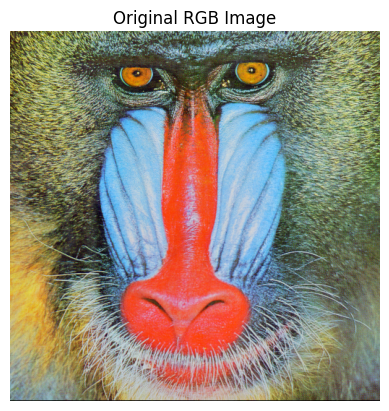

In [17]:
plt.imshow(img_rgb)
plt.title('Original RGB Image')
plt.axis('off')
plt.show()

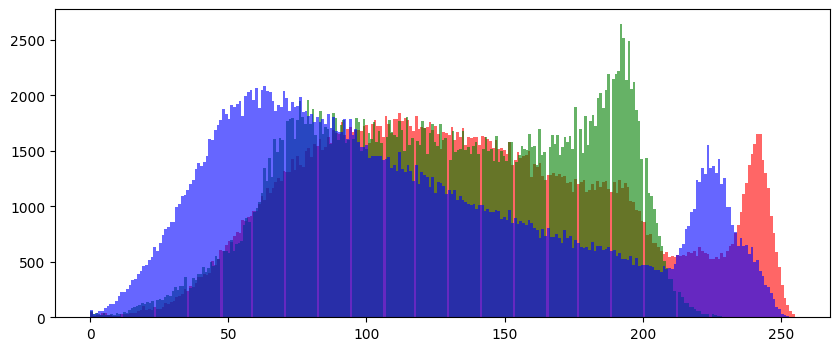

In [18]:
colors = ('r', 'g', 'b')
plt.figure(figsize=(10, 4))

for i, color in enumerate(colors):
    channel = img_rgb[:, :, i]
    plt.hist(channel.ravel(), bins=256, color=color, alpha=0.6, label=f'{color.upper()} channel')

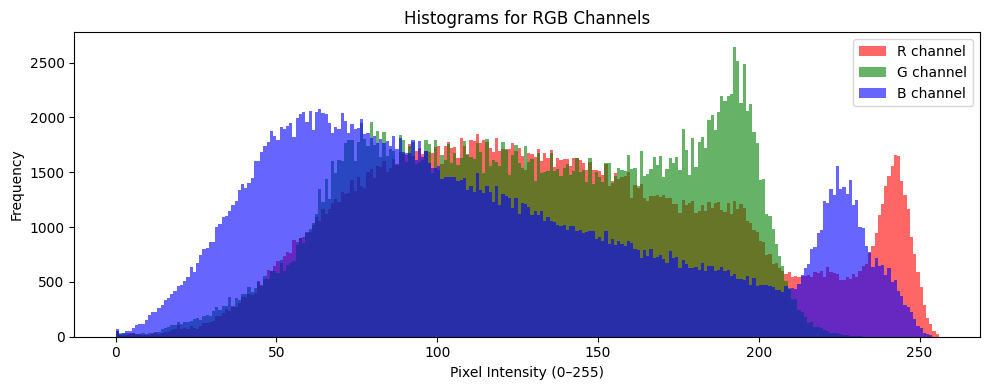

In [19]:
colors = ('r', 'g', 'b')
plt.figure(figsize=(10, 4))

for i, color in enumerate(colors):
    channel = img_rgb[:, :, i]
    plt.hist(channel.ravel(), bins=256, range=(0, 256), color=color, alpha=0.6, label=f'{color.upper()} channel')

plt.title('Histograms for RGB Channels')
plt.xlabel('Pixel Intensity (0–255)')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()
plt.show()


In [20]:
print(img_rgb.shape)
print(img_rgb.dtype)
print(img_rgb[0, 0])  # Check pixel values


(512, 512, 3)
uint8
[164 150  71]


In [21]:
def apply_gamma_correction(image, gamma):
    normalized = image / 255.0
    corrected = np.power(normalized, gamma)
    result = (corrected * 255).astype(np.uint8)
    return result



In [22]:
gamma_bright = apply_gamma_correction(img_rgb, gamma=0.5)
gamma_dark = apply_gamma_correction(img_rgb, gamma=2.0)

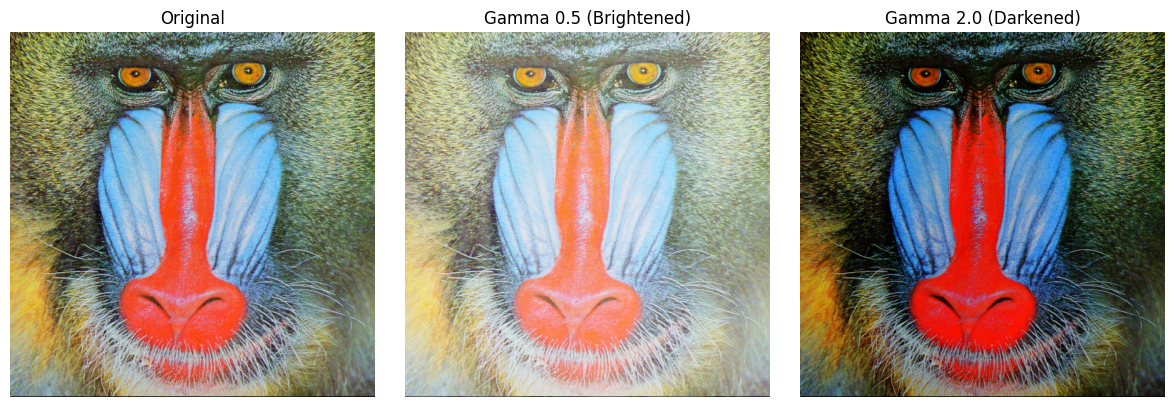

In [24]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(gamma_bright)
plt.title("Gamma 0.5 (Brightened)")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(gamma_dark)
plt.title("Gamma 2.0 (Darkened)")
plt.axis("off")

plt.tight_layout()
plt.show()


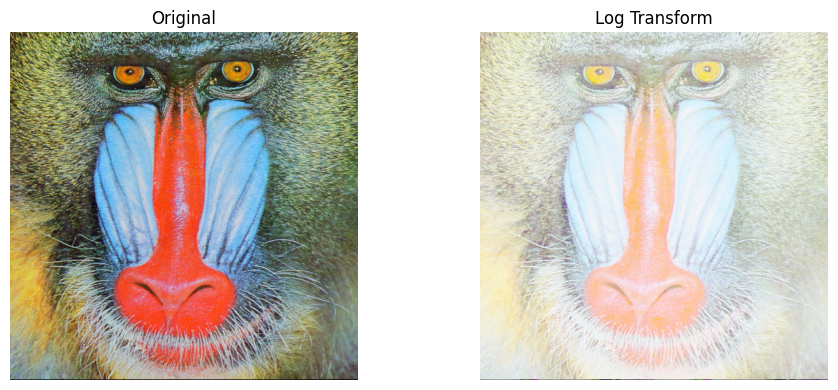

In [25]:
def apply_log_transform(image):
    image_float = image.astype(np.float32)
    c = 255 / np.log(1 + np.max(image_float))
    log_image = c * np.log(1 + image_float)
    return np.clip(log_image, 0, 255).astype(np.uint8)

log_img = apply_log_transform(img_rgb)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(log_img)
plt.title("Log Transform")
plt.axis("off")

plt.tight_layout()
plt.show()


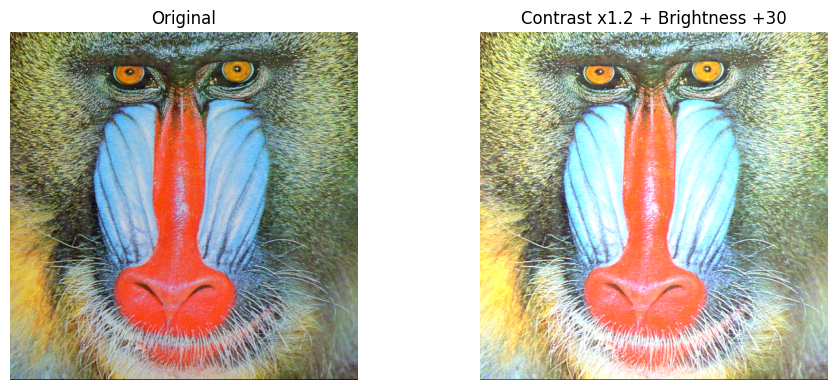

In [26]:
def adjust_brightness_contrast(image, alpha=1.2, beta=30):
    result = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return result

adjusted_img = adjust_brightness_contrast(img_rgb, alpha=1.2, beta=30)

# Show side-by-side
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(adjusted_img)
plt.title("Contrast x1.2 + Brightness +30")
plt.axis("off")
plt.tight_layout()
plt.show()


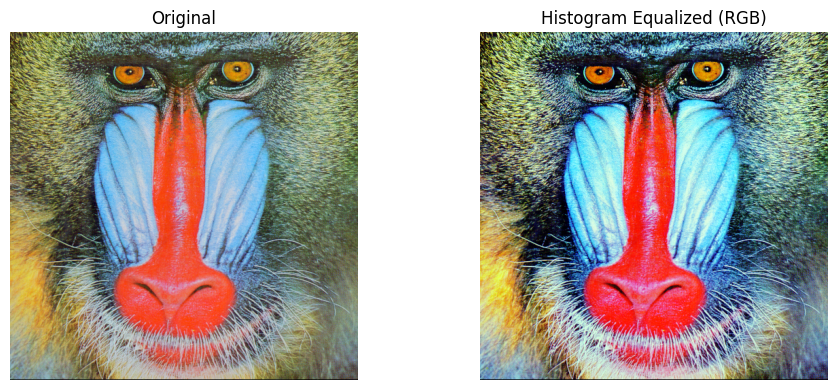

In [27]:

r, g, b = cv2.split(img_rgb)

r_eq = cv2.equalizeHist(r)
g_eq = cv2.equalizeHist(g)
b_eq = cv2.equalizeHist(b)


equalized_rgb = cv2.merge([r_eq, g_eq, b_eq])


plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(equalized_rgb)
plt.title("Histogram Equalized (RGB)")
plt.axis("off")
plt.tight_layout()
plt.show()


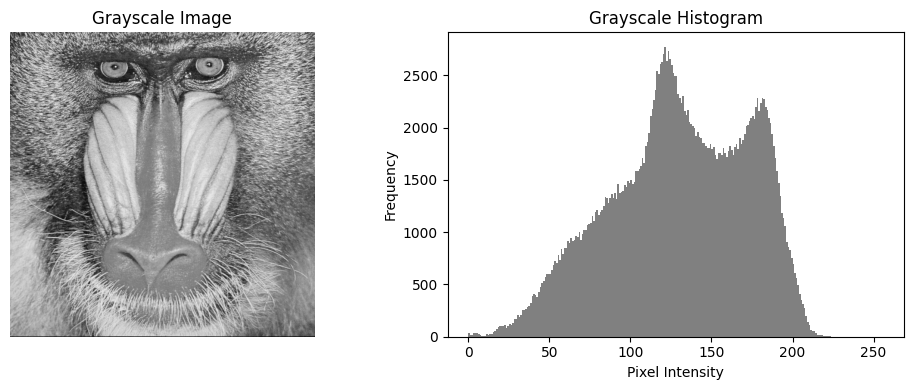

In [28]:

gray_img = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)


plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.hist(gray_img.ravel(), bins=256, range=(0, 256), color='gray')
plt.title("Grayscale Histogram")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


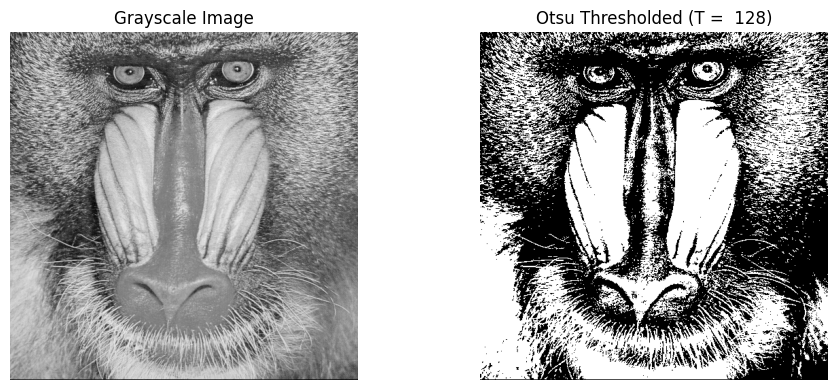

In [29]:
# Apply Otsu's thresholding
_, otsu_thresh = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Show original vs thresholded
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Grayscale Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(otsu_thresh, cmap='gray')
plt.title(f"Otsu Thresholded (T = {_: .0f})")
plt.axis("off")

plt.tight_layout()
plt.show()
